39209 39209


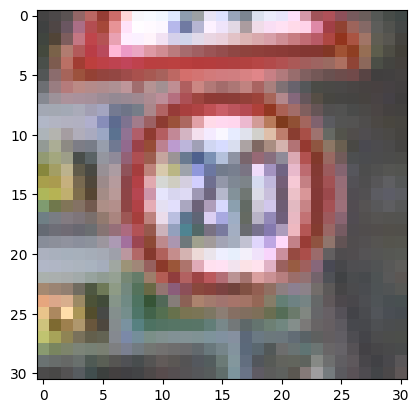

<class 'list'> <class 'list'>


In [1]:

import numpy as np
import matplotlib as plt
import seaborn as sns
from readTrafficSigns1 import readTrafficSigns
#import scikit-learn as sk   #only for visualization and pre-processing 

#load data 

#does this work? just copied from google?!

import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import glob
from readTrafficSigns1 import readTrafficSigns
trainImages, trainLabels = readTrafficSigns(r"C:\Users\belan\Documents\Uni\4. Semester\Foundations of ML\Final Assignment Data\GTSRB_Final_Training_Images\GTSRB\Final_Training\Images")
print(len(trainLabels), len(trainImages))
plt.imshow(trainImages[3])
plt.show()
print(type(trainLabels),type(trainImages))

In [ ]:


lines = text_file.read().split(',')
import csv
with open('filename.csv', 'r') as fd:
    reader = csv.reader(fd)
    for row in reader:
        # do something

In [ ]:
train_images = open('train_images.txt', 'x')
train_images.write(str(trainImages))
train_images.close()

trainImages = np.loadtxt('train_images.txt', dtype=int, delimiter=',')
 
train_labels = open('train_labels.txt', 'x')
train_labels.write(str(trainLabels))
train_labels.close()

trainLabels = np.loadtxt('train_labels.txt', dtype=int, delimiter=',')

print(type(trainImages))

In [4]:
print(type(trainImages))

<class 'list'>


(31, 31, 3)
225 243


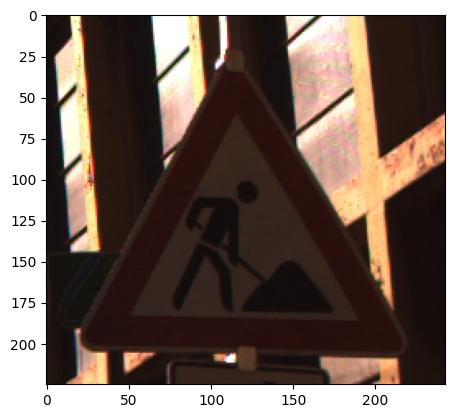

In [2]:
print(trainImages[3].shape)
max_pixel_x = 0
max_pixel_y = 0


for i in range(len(trainImages)):
    pixel_x = trainImages[i].shape[0]
    pixel_y = trainImages[i].shape[1]

    if pixel_x > max_pixel_x:
        max_pixel_x = pixel_x
        index = i 
    if pixel_y > max_pixel_y:
        max_pixel_y = pixel_y

print(max_pixel_x, max_pixel_y)
plt.imshow(trainImages[index])

(225, 243, 3)


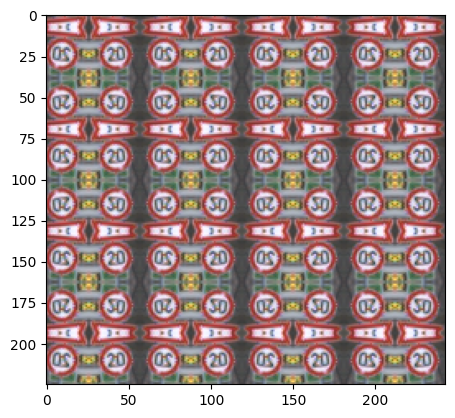

In [3]:
resized_images = []

#go through all images and resize them to 225 x 243 pixels by making reflecting borders
for i in range(len(trainImages)):
    img = trainImages[i]
    pixel_x = trainImages[i].shape[0] #gets pixel size of image
    pixel_y = trainImages[i].shape[1]
    border_x = max_pixel_x - pixel_x  #calculates border size
    border_y = max_pixel_y - pixel_y
    #actually adding the border to the image
    img = cv2.copyMakeBorder(img,border_x,0, border_y,0,cv2.BORDER_REFLECT) 
    #save new image with borders
    resized_images.append(img)

plt.imshow(resized_images[5])
print(resized_images[3].shape)


Dimensions of the normlized image:(225, 243) Example of normalized values:[[0.27058824 0.2745098  0.30980392 ... 0.27058824 0.2627451  0.24705882]
 [0.28235294 0.28627451 0.29019608 ... 0.2627451  0.2627451  0.25490196]
 [0.3372549  0.34509804 0.37647059 ... 0.25098039 0.25490196 0.2627451 ]
 ...
 [0.39215686 0.40392157 0.44705882 ... 0.27843137 0.28627451 0.29019608]
 [0.37254902 0.43529412 0.53333333 ... 0.25490196 0.28627451 0.34117647]
 [0.35686275 0.47843137 0.61960784 ... 0.27058824 0.28627451 0.34901961]]


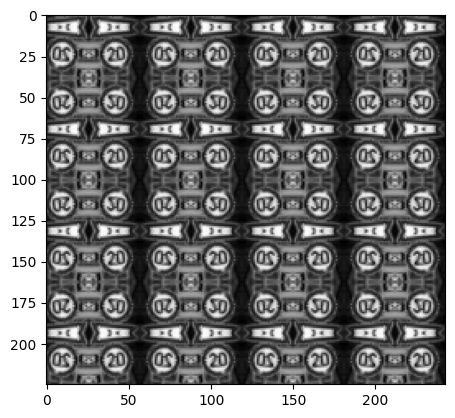

In [5]:
#conversion to grey scale and normalization
normalized_images = []
grey_scale_images = []
for i in range(len(resized_images)):
    #conversion to greyscale reduces dimensiomns from 3 to 2
    grey_scale_images.append(cv2.cvtColor(resized_images[i], cv2.COLOR_RGB2GRAY))  # Convert to grayscale
    normalized_images.append(grey_scale_images[i] / 255.0)  # Normalize pixel values to [0, 1]
#plot gray scale image and show normalized values of image
plt.imshow(grey_scale_images[5], cmap='gray')
print(f"Dimensions of the normlized image:{normalized_images[3].shape}",f"Example of normalized values:{normalized_images[3]}")


In [31]:
print(normalized_images[1][0].ndim)
normalized_images_memmap= np.memmap('normalized_images1.npy', dtype='float32', mode='w+', shape=(len(normalized_images), normalized_images[0].shape[0], normalized_images[0].shape[1]))

1


In [ ]:
import gzip
a = gzip.GzipFile('normalized_images1.npy.gz', 'w')
np.save (a,normalized_images)
a.close()

a = gzip.GzipFile('normalized_images1.npy.gz', 'r')
np.load(a)


In [33]:
#np.save('normalized_images.npy', normalized_images_memmap)
#normalized_images = np.load(normalized_images1.npy) 
print(normalized_images_memmap) # Save the normalized images as a .npy file

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
